<a href="https://colab.research.google.com/github/gsgol/Data_analysis/blob/main/lab1/Golovanov_Marevichev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.decomposition import FastICA

In [49]:
# Прочитаем данные из файла
df = pd.read_excel("https://raw.githubusercontent.com/gsgol/Data_analysis/refs/heads/main/lab1/24MAG_HW_1_v15.xls", header=None)

In [50]:
df

,0,1,2,3,4,5
0,35.0,2.0,29400.0,6.0,29000.0,289000.0
1,32.0,2.0,NaN,5.0,36000.0,365000.0
2,32.0,1.0,27000.0,5.0,26000.0,261000.0
3,19.0,2.0,8000.0,12.0,50000.0,200000.0
4,36.0,2.0,29000.0,7.0,28000.0,287000.0
5,45.0,3.0,38600.0,12.0,40000.0,397000.0
6,31.0,1.0,18200.0,5.0,16000.0,170000.0
7,41.0,2.0,26100.0,10.0,27000.0,264000.0
8,31.0,1.0,16200.0,NaN,14000.0,148000.0
9,27.0,0.0,20200.0,2.0,17000.0,185000.0


In [51]:
# Переименуем колонки в более информативные
df_renamed = df.rename({0: 'Age', 1: 'numOfDependents', 2: 'income', 3: 'timeSpentInRegion', 4:"carPrice", 5:"loanSize"}, axis='columns')

In [52]:
# Посмотрим на основные значения
df_renamed.describe()

,Age,numOfDependents,income,timeSpentInRegion,carPrice,loanSize
count,40.000000,39.000000,40.000000,40.000000,40.000000,40.000000
mean,39.125000,2.000000,18852.500000,10.050000,21000.000000,205025.000000
std,9.143269,1.100239,9878.751803,4.701064,11756.067719,98230.364385
min,19.000000,0.000000,700.000000,1.000000,0.000000,3000.000000
25%,31.750000,1.000000,12400.000000,5.750000,14750.000000,156750.000000
50%,39.500000,2.000000,18450.000000,10.000000,20000.000000,208000.000000
75%,44.250000,3.000000,26400.000000,13.000000,27250.000000,269000.000000
max,56.000000,4.000000,38600.000000,20.000000,50000.000000,397000.000000


[]

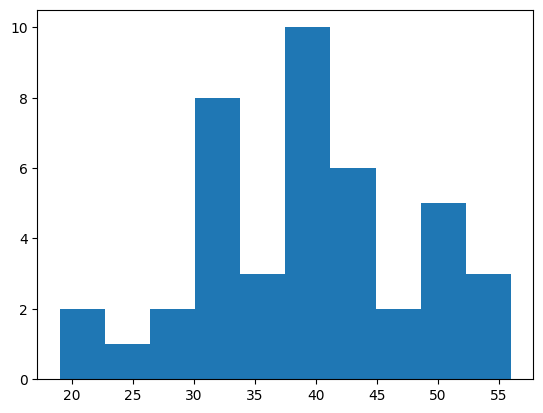

In [101]:
plt.hist(df_renamed["Age"])
plt.plot()

[]

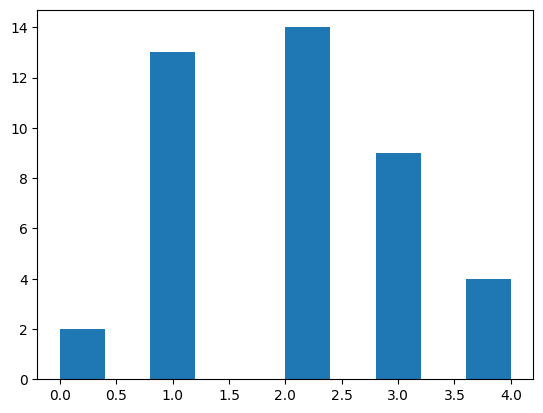

In [113]:
plt.hist(df_renamed["numOfDependents"])
plt.plot()

[]

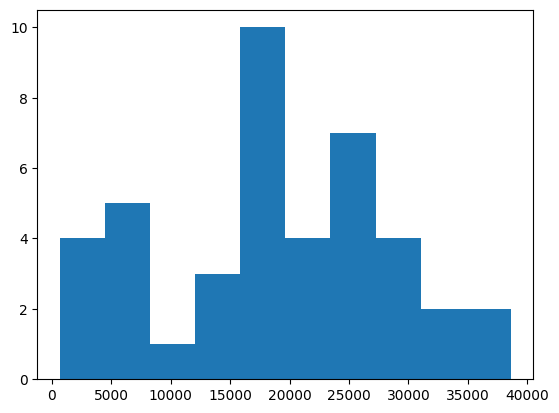

In [104]:
plt.hist(df_renamed["income"])
plt.plot()

[]

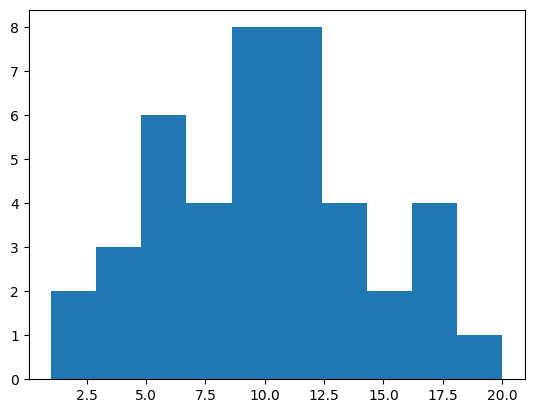

In [105]:
plt.hist(df_renamed["timeSpentInRegion"])
plt.plot()

[]

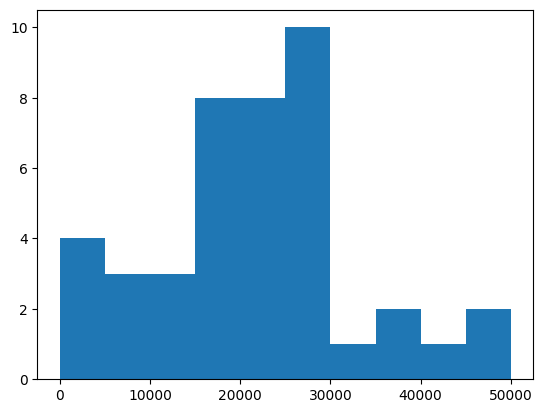

In [106]:
plt.hist(df_renamed["carPrice"])
plt.plot()

Исходя из графиков, распределения признаков похоже на распределения Стьюдента и нормальное распределение

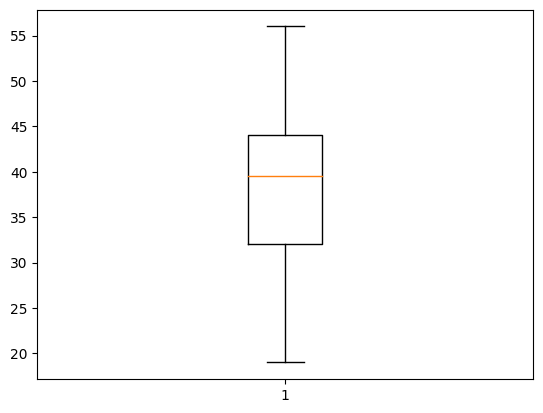

In [110]:
plt.boxplot(df_renamed["Age"])
plt.show()

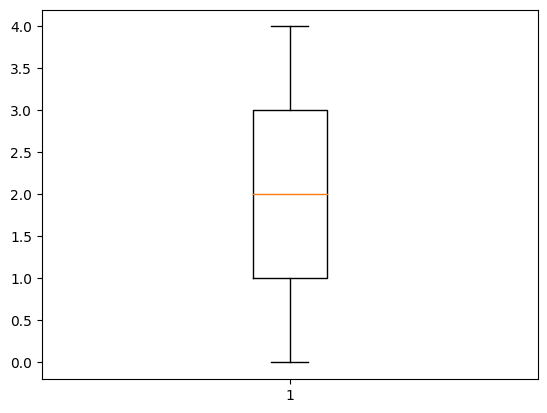

In [111]:
plt.boxplot(df_renamed["numOfDependents"])
plt.show()

[]

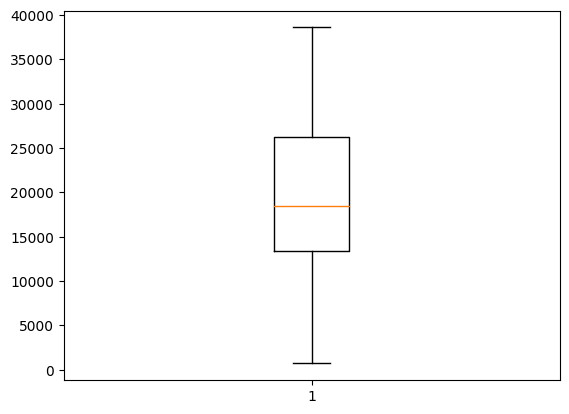

In [116]:
plt.boxplot(df_renamed["income"])
plt.plot()

[]

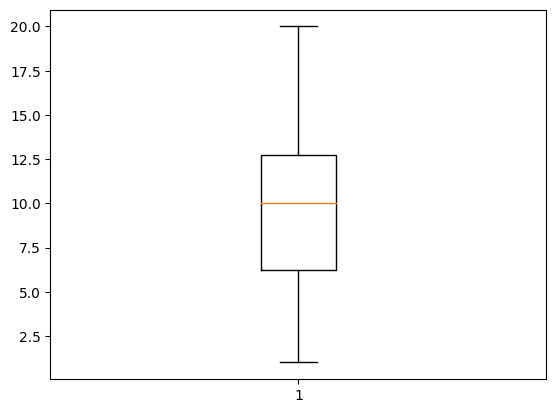

In [117]:
plt.boxplot(df_renamed["timeSpentInRegion"])
plt.plot()

[]

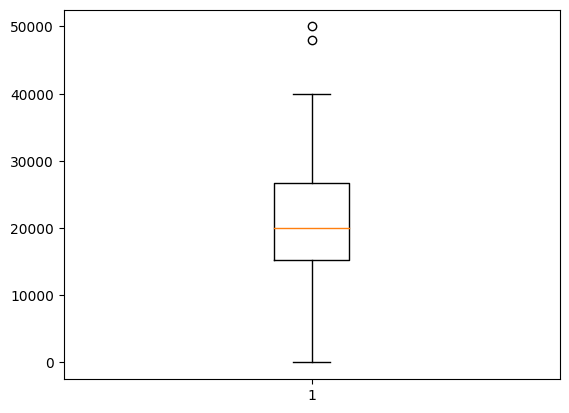

In [115]:
plt.boxplot(df_renamed["carPrice"])
plt.plot()

Исходя из данных графиков можно заметить, что данные распределены довольно кучно, но в некоторых признаках встречаются выбросы

In [55]:
# Заполним пропуски медианным значением
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df_renamed = pd.DataFrame(data=imp.fit_transform(df_renamed), columns = df_renamed.columns)

In [56]:
# Уберем тех клиентов у которых значение Z-отклонения меньше 1.5
z_dev = np.abs(stats.zscore(df_renamed))

df_final = df_renamed[(z_dev < 1.5).all(axis=1)]

In [86]:
# Посчитаем манхэттенское расстояние между клиентами
dist_manhattan = manhattan_distances(df_final)

In [90]:
# Понизим размерность пространства до 2-х при помощи ICA(Independent Computing Architecture)
ica2D = FastICA(n_components=2)
df_after_ica = ica2D.fit_transform(dist_manhattan)

In [93]:
# Проверим сохранилось ли расстояние
(manhattan_distances(df_after_ica) == dist_manhattan).all()

False

Расстояние после понижения размерности не сохранилось


In [98]:
# Используем MDS для снижения размерности
mds = MDS(dissimilarity='precomputed', n_components=2)

df_reduced = mds.fit_transform(dist_manhattan)

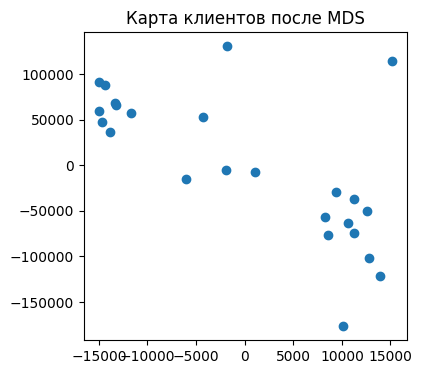

In [99]:
# Построим карту распределения клиентов
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(122)
plt.scatter(df_reduced[:,0], df_reduced[:,1])
plt.title('Карта клиентов после MDS')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()